# End to End Machine Learning Project

Although there's no recipe for a succesful Machine Learning project, there are some common steps which are usually followed:
1. **Brainstorming**: Look at the big picture, formulate questions
2. **Data Extraction / Mining**: Get the data
3. **Exploratory Data Analysis**: Discover and visualize the data to gain insights
4. **Preprocessing**: Prepare the data for Machine Learning algorithms 
5. **Model Selection and Training**: Select one or more models and train them on the data
6. **Fine-Tuning**: Select the best model, and fine-tune it
7. **Benchmarking and prediction**: Present your solution
8. **Production**: Launch, monitor and mantain your system

In this notebook, we will take the California Housing dataset, in which you have already performed some basic EDA, and make some preprocessing of the data. If you do it right, by the end of this notebook you'll be able to train a Machine Learning model and see it perform!

## Imports and Data Fetching

First we do some imports and define useful paths and functions for data loading and plotting.

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn as sk
assert sk.__version__ >= "0.20"

# Common imports
import numpy as np
import pandas as pd
import os

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "02_EndToEnd"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

#Lets download the picture of california 
!wget "https://raw.githubusercontent.com/ageron/handson-ml2/master/images/end_to_end_project/california.png" -P {IMAGES_PATH}

# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

HOUSING_PATH = "datasets"
def load_housing_data(housing_path=HOUSING_PATH):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

--2022-03-15 21:16:59--  https://raw.githubusercontent.com/ageron/handson-ml2/master/images/end_to_end_project/california.png
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 10034 (9.8K) [image/png]
Saving to: ‘./images/02_EndToEnd/california.png’

california.png      100%[===================>]   9.80K  --.-KB/s    in 0s      

2022-03-15 21:16:59 (76.1 MB/s) - ‘./images/02_EndToEnd/california.png’ saved [10034/10034]



If you're running this notebook in Colab, run the following cell to download the dataset:

In [2]:
if 'google.colab' in sys.modules:
        
    import tarfile

    DOWNLOAD_ROOT = "https://github.com/ageron/handson-ml2/raw/master/"
    HOUSING_URL = DOWNLOAD_ROOT + "datasets/housing/housing.tgz"

    !mkdir -p ./datasets/housing

    def fetch_housing_data(housing_url=HOUSING_URL, housing_path=HOUSING_PATH):
        os.makedirs(housing_path, exist_ok=True)
        tgz_path = os.path.join(housing_path, "housing.tgz")
        #urllib.request.urlretrieve(housing_url, tgz_path)
        !wget {HOUSING_URL} -P {housing_path}
        housing_tgz = tarfile.open(tgz_path)
        housing_tgz.extractall(path=housing_path)
        housing_tgz.close()

    # Corramos la función
    fetch_housing_data()

else: 
    print("Not running on Google Colab. This cell is did not do anything.")

--2022-03-15 21:17:10--  https://github.com/ageron/handson-ml2/raw/master/datasets/housing/housing.tgz
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz [following]
--2022-03-15 21:17:10--  https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.tgz
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 409488 (400K) [application/octet-stream]
Saving to: ‘datasets/housing.tgz’

housing.tgz         100%[===================>] 399.89K  --.-KB/s    in 0.02s   

2022-03-15 21:17:10 (15.7 MB/s) - ‘datasets/housing.tgz’ saved [4

Now run the following cell to fetch the data.

In [3]:
housing = load_housing_data()

## EDA + Problem Framing

In our last session we ended up with a nice plot like this one

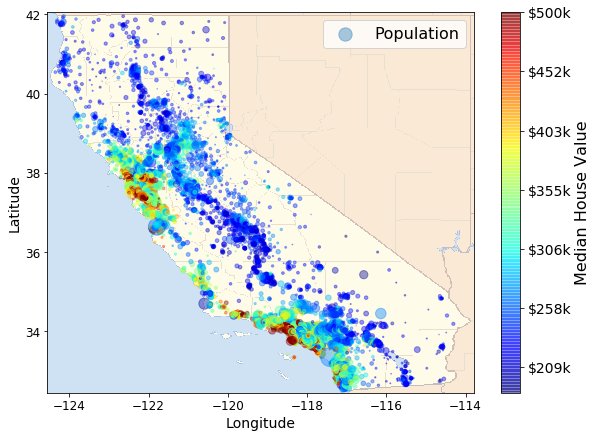

In [ ]:
california_img=mpl.image.imread(os.path.join(IMAGES_PATH, "california.png"))
ax = housing.plot(kind="scatter", x="longitude", y="latitude", figsize=(10,7),
                       s=housing['population']/100, label="Population",
                       c="median_house_value", cmap=plt.get_cmap("jet"),
                       colorbar=False, alpha=0.4,
                      )
plt.imshow(california_img, extent=[-124.55, -113.80, 32.45, 42.05], alpha=0.5,
           cmap=plt.get_cmap("jet"))
plt.ylabel("Latitude", fontsize=14)
plt.xlabel("Longitude", fontsize=14)

prices = housing["median_house_value"]
tick_values = np.linspace(prices.min(), prices.max(), 11)
cbar = plt.colorbar(ticks=tick_values/prices.max())
cbar.ax.set_yticklabels(["$%dk"%(round(v/1000)) for v in tick_values], fontsize=14)
cbar.set_label('Median House Value', fontsize=16)

plt.legend(fontsize=16)
plt.show()

With this information we can then define what kind of model we want to develop, i.e. what *intelligent system* are we going to design that makes something useful from this data.

Today, we'll focus on predicting the *Median House Value* of a given district (this will be our **TARGET**), based on the atributes present in the dataset (these will be our **FEATURES**). 

Our target is a *continuous* quantity (a real number), so in the usual ML jargon what we want to do is to perform a **REGRESSION** on the dataset.

In [5]:
#Complete the code with the name of the column containing the target 

target_column_name = 'median_house_value'

X = housing.drop(target_column_name, axis=1) #features
y = housing[target_column_name] #target

# Feature Engineering

A nice way to see how the features correlate to each other is by printing a scatter plot of pairs of features, something called the _Scatter Matrix_. 

Pandas has already a builtin function for this.

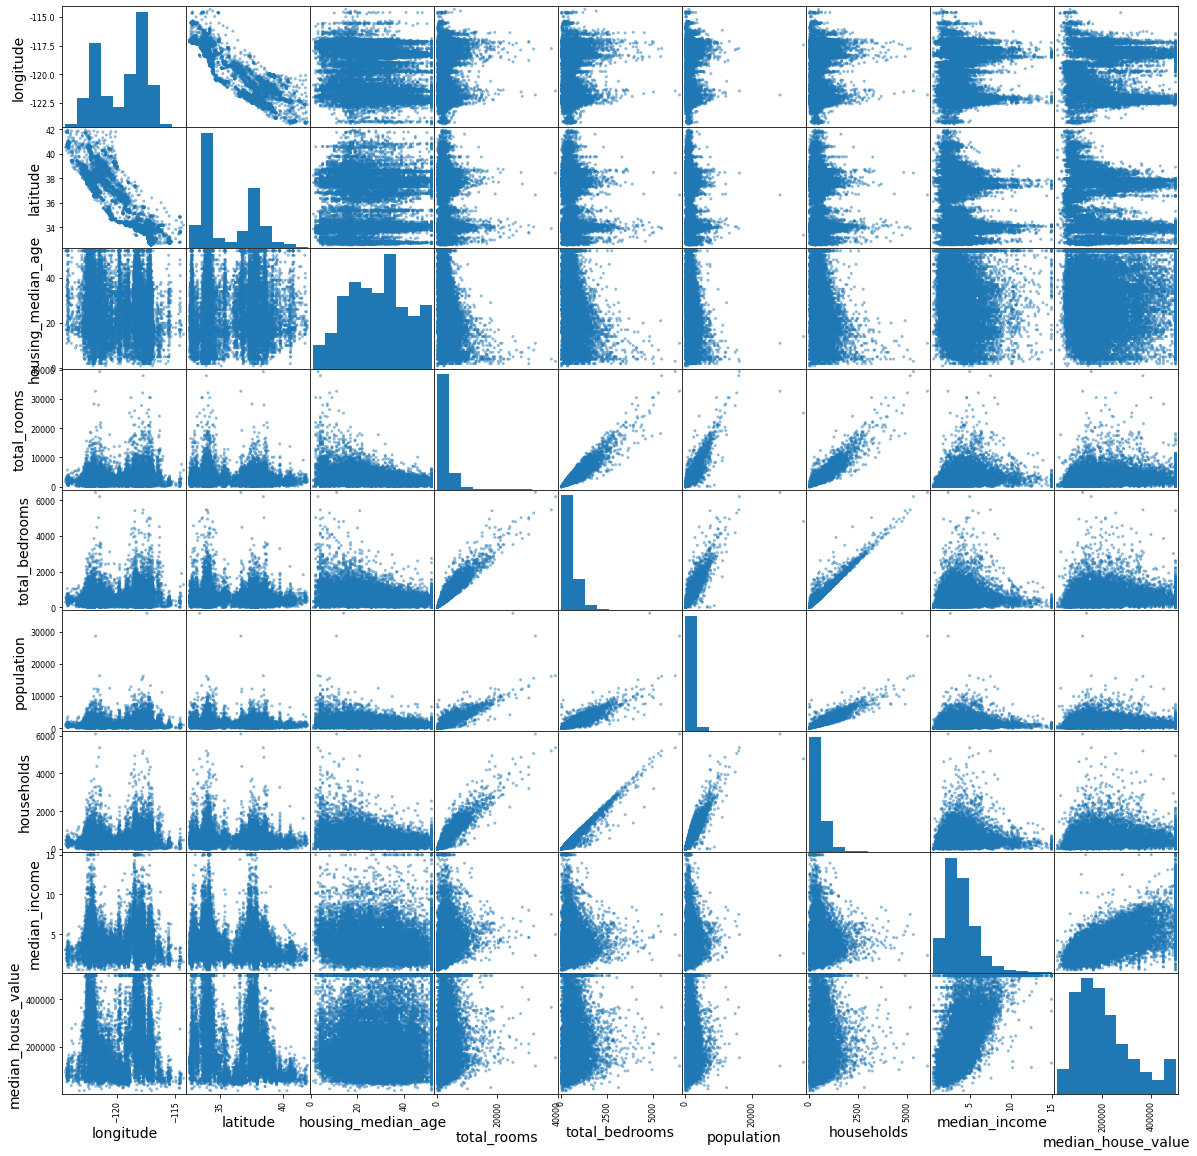

In [6]:
pd.plotting.scatter_matrix(housing, figsize=(20,20))
plt.show()

Note that the last column/row shows the dependence of our target with each feature. To be more quantitative, we can measure the correlation of each feature with the target, using the `corrwith(target)` method of a Pandas DataFrame.

Fill the following line to compute the correlation of the dataframe with the target variable.

_Pro Tip: You can take the absolute value of the correlation, and order in descending order to easily spot the most important features_

In [8]:
X.corrwith(y).abs().sort_values(ascending=False)

median_income         0.688075
latitude              0.144160
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
longitude             0.045967
population            0.024650
dtype: float64

Exploration is important to spot what features will be the most important for our model, and also because it serves as inspiration to combine them into new features (a.k.a. _feature engineering_). 


One idea for new features, would be to look at relative quantities, instead of district totals. 
Use the features present in the dataset to compute the rooms, bedrooms and population per household/rooms: 

In [9]:
X['rooms_per_household'] = X['total_rooms']/X['households']
X['bedrooms_per_household'] = X['total_bedrooms']/X['households']
X['bedrooms_per_rooms'] = X['total_bedrooms']/X['total_rooms']
X['population_per_household'] = X['population']/X['households']
X['population_per_rooms'] = X['population']/X['total_rooms']


Now compute again the correlation of `X` to `y` and see how the new features rank.

In [12]:
#Correlation of X with y:
X.corrwith(y).abs().sort_values(ascending=False)

median_income               0.688075
bedrooms_per_rooms          0.255880
rooms_per_household         0.151948
latitude                    0.144160
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
bedrooms_per_household      0.046739
longitude                   0.045967
population_per_rooms        0.033557
population                  0.024650
population_per_household    0.023737
dtype: float64

Pick the quantities that look the most promising to the dataset original dataset, before we proceed with the data preparation:

In [13]:
#example:
housing['bedrooms_per_rooms'] = housing['total_bedrooms']/housing['total_rooms']
housing['bedrooms_per_household'] = housing['total_bedrooms']/housing['households']

## Train / Test Splitting

One of the firsts things any aspiring Data Scientist has to learn (and **NEVER** forget) is to intelligently split the data into Training data (which we are going to use to fit our model) and the Test or Evaluation data  (in which we will asess how well our model is performing). This is in order to keep this last observation as objective as possible, as it should be a test on how well our model deals with new data. 

In its most basic form, we can just randomly pick a portion (say 20%) of the dataset to be held as a test set:

In [14]:
from sklearn.model_selection import train_test_split

dataset = housing
percentage = 0.1 #write as a float, e.g. 10% as 0.1

train_df, test_df = train_test_split(housing, test_size=percentage, random_state=42)

(In more advanced applications, we might want to ensure that a certain feature in the test set follows a certain distribution.)

### Stratified split *(Advanced)*
This section is a bit more advanced, and you are free to skip it. You'll find some of these in the notebooks of this course.

A more sofisticated way to split our training and test data, is to use a _stratified split_.
Let's say we want to preserve the proportion of certain categories, for example `median_income`. Let's define 5 categories by hand

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


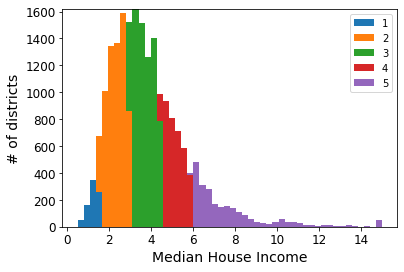

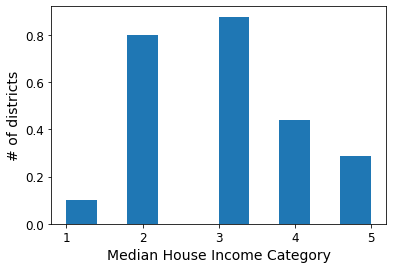

3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: income_cat, dtype: float64

In [15]:
housing_2 = housing.copy()
housing_2["income_cat"] = pd.cut(housing_2["median_income"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

plt.hist([housing_2[housing_2["income_cat"] == cat].median_income for cat in range(1,6)], 
         label =  list(range(1,6)), 
         bins=50,
         stacked=True)
plt.legend()
plt.ylabel('# of districts')
plt.xlabel('Median House Income')
plt.show()
plt.hist(housing_2['income_cat'], density=True)
plt.xticks([1,2,3,4,5])
plt.ylabel('# of districts')
plt.xlabel('Median House Income Category')
plt.show()

housing_2['income_cat'].value_counts() / len(housing_2)

When we performed a random shuffle, what happened to this distribution?? Was it preserved?

3    0.358527
2    0.324370
4    0.167393
5    0.109496
1    0.040213
Name: income_cat, dtype: float64

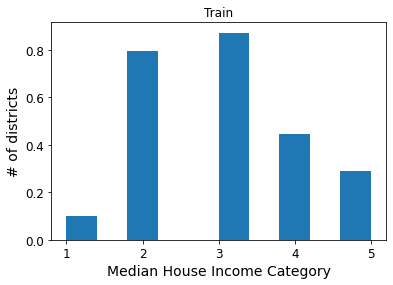

In [16]:
train_df_2, test_df_2 = train_test_split(housing_2, test_size=0.2, random_state=42)

plt.hist(train_df_2['income_cat'], density=True)
plt.xticks([1,2,3,4,5])
plt.ylabel('# of districts')
plt.xlabel('Median House Income Category')
plt.title('Train')
test_df_2['income_cat'].value_counts() / len(test_df_2)

It changed slightly... Let's see what happen if we use the `StratifiedShuffleSplit` class from `sklearn` to preserve the percentage of each category in the split.

In [20]:
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)

for train_index, test_index in split.split(housing_2, housing_2["income_cat"]):
    train_2 = housing_2.loc[train_index]
    test_2 = housing_2.loc[test_index]

print(f"Lenght of the training set: {len(train_2)}")
print(f"Lenght of the test set: {len(test_2)}")

Lenght of the training set: 16512
Lenght of the test set: 4128


In [18]:
train_2['income_cat'].value_counts() / len(train_2)

3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: income_cat, dtype: float64

This looks a little bit better. The comparison is the following:

In [19]:
comparison_df = pd.concat([housing_2['income_cat'].value_counts() / len(housing_2), test_df_2['income_cat'].value_counts() / len(test_df_2),test_2['income_cat'].value_counts() / len(test_2)], axis=1)
comparison_df.columns = ['original', 'random_split', 'stratified_split']
comparison_df

,original,random_split,stratified_split
3,0.350581,0.358527,0.350533
2,0.318847,0.324370,0.318798
4,0.176308,0.167393,0.176357
5,0.114438,0.109496,0.114341
1,0.039826,0.040213,0.039971


The difference might look like subtle, but depending on small database the risk of inducing a *sampling bias* is greater.

## Data Preprocessing

Now we're all set to start fitting models, right?... No.

Most models can only handle data if its fed to them in a particular form (e.g. numbers normally distributed between 0 and 1). So most likely, any dataset you encounter needs some proper cleaning and pre-processing before any model can be trained on it.

### Data Cleaning

As mentioned in the previous session, there are values in the dataset which do not seem right.

Fill and run the cell below to plot a histogram of each feature in the dataset `housing`.

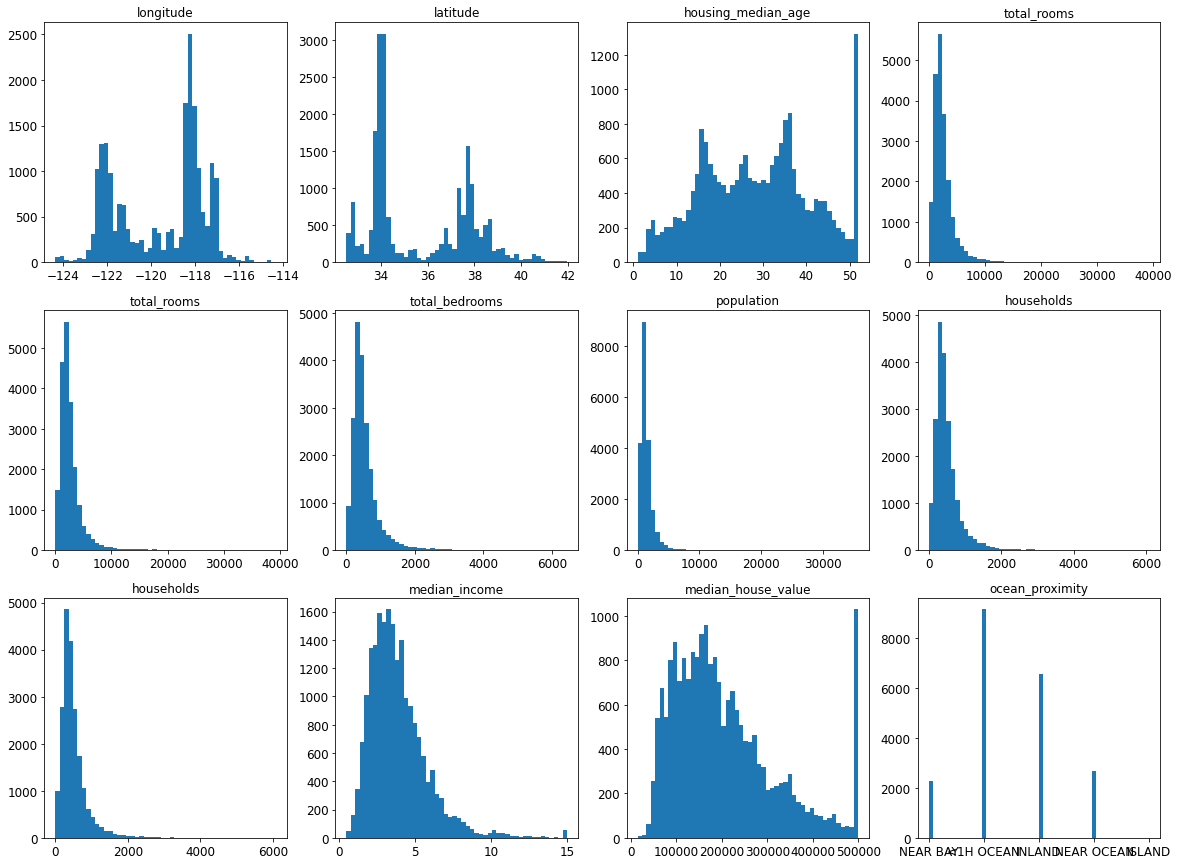

In [23]:
df = housing

#Plot histograms of the features in `df`
columns = df.columns.to_list()

N_col = 4
N = len(columns)
N_rows = int(np.ceil(N/N_col))

fig, ax = plt.subplots(N_rows,N_col, figsize=(5*N_col,5*N_rows))

for i in range(N_rows):
    for j in range(N_col):
        ax[i,j].hist(df[columns[i*N_rows+j]], bins=50)
        ax[i,j].set_title(columns[i*N_rows+j])


There are some columns which seem a bit problematic, near the right end of the distribution (a.k.a. the _tail_ ), can you spot them?

Let's look at how many samples of our dataset fall into _that particular maximum value_. 
Complete the cell below with the names of the problematic features.

In [27]:
problematic_columns = ['median_house_value', 'housing_median_age','median_income']
max_values=[]
for col in problematic_columns:
    max_value = housing[col].max()
    print(f"{col}: {sum(housing[col] == max_value)} districts with {col} = {max_value} ({round(sum(housing[col] == max_value)/len(housing)*100,2)}%).")
    max_values.append(max_value)

median_house_value: 965 districts with median_house_value = 500001.0 (4.68%).
housing_median_age: 1273 districts with housing_median_age = 52.0 (6.17%).
median_income: 49 districts with median_income = 15.0001 (0.24%).


We need to decide what to do about these districts:
* Do we take them into account?
* Do we ignore them?

For the sake of simplicity, we'll just ignore them (although we might be loosing information). We will first make a copy of our original dataset, just to be sure we can come back to it if needed:

In [28]:
housing_clean = housing.copy()
for col, max_value in zip(problematic_columns, max_values):
    housing_clean = housing_clean[housing_clean[col] != max_value]

Now, lets plot again the histograms, but on the clean dataset

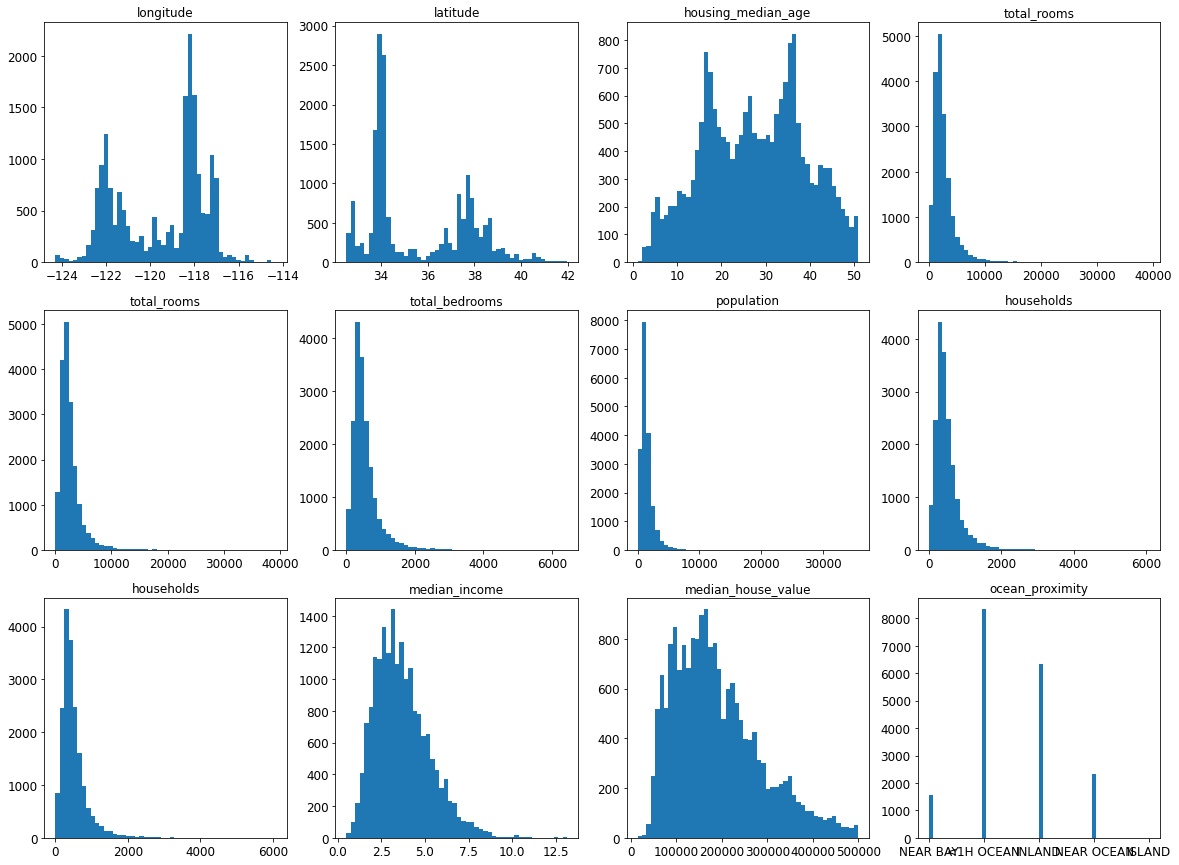

In [29]:
df = housing_clean

#Plot histograms of the features in `df`
columns = df.columns.to_list()

N_col = 4
N = len(columns)
N_rows = int(np.ceil(N/N_col))

fig, ax = plt.subplots(N_rows,N_col, figsize=(5*N_col,5*N_rows))

for i in range(N_rows):
    for j in range(N_col):
        ax[i,j].hist(df[columns[i*N_rows+j]], bins=50)
        ax[i,j].set_title(columns[i*N_rows+j])


Since we changed our dataset, let's repeat the train/test splitting we did before, but with our clean dataset

In [30]:
target_column_name = 'median_house_value'
dataset = housing_clean
percentage = 0.2

X = dataset.drop(target_column_name, axis=1) #features
y = dataset[target_column_name] #target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=percentage, random_state=42)

### Missing Values

If we look closely into each atribute, we notice that `total_bedrooms` has some missing values:

In [31]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 18570 entries, 0 to 20639
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               18570 non-null  float64
 1   latitude                18570 non-null  float64
 2   housing_median_age      18570 non-null  float64
 3   total_rooms             18570 non-null  float64
 4   total_bedrooms          18377 non-null  float64
 5   population              18570 non-null  float64
 6   households              18570 non-null  float64
 7   median_income           18570 non-null  float64
 8   ocean_proximity         18570 non-null  object 
 9   bedrooms_per_rooms      18377 non-null  float64
 10  bedrooms_per_household  18377 non-null  float64
dtypes: float64(10), object(1)
memory usage: 1.7+ MB


Use the method `.isna()` of a pandas dataframe to see how many samples are missing.

In [34]:
#let's see the NaN Values
X.isna()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,bedrooms_per_rooms,bedrooms_per_household
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
15,False,False,False,False,False,False,False,False,False,False,False
18,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
20635,False,False,False,False,False,False,False,False,False,False,False
20636,False,False,False,False,False,False,False,False,False,False,False
20637,False,False,False,False,False,False,False,False,False,False,False
20638,False,False,False,False,False,False,False,False,False,False,False


Divide this series by the count of samples of each column, using the `.count()` method. This way you can see what percentage of the dataset this represents:

In [35]:
#complete with the count of the X dataset.
X.isna().sum() / X.count()

longitude                 0.000000
latitude                  0.000000
housing_median_age        0.000000
total_rooms               0.000000
total_bedrooms            0.010502
population                0.000000
households                0.000000
median_income             0.000000
ocean_proximity           0.000000
bedrooms_per_rooms        0.010502
bedrooms_per_household    0.010502
dtype: float64

Most models won't handle properly null values, so we need to do something about these samples. 

Generally speaking, we have three options:
1. Exclude the features with missing values from the analysis
2. Exclude the samples with missing values from the analysis
3. Fill the missing values with synthetic data (a fix number, an aggregate of the dataset such as a mean, median, etc.)

The optimal choice generally depend on the number of missing values in the feature, the number of features with missing values and the nature of the feature itself.

In this example, we will go for option three and fill the missing values in total_bedrooms with the median of the training dataset.

Complete the cells below to compute the median of the problematic column.

In [36]:
missing_data_column = ['total_bedrooms', 'bedrooms_per_household','bedrooms_per_rooms']

#complete with the `.median()` method of the pandas series.
median = X_train[missing_data_column].median()

Now we will use this median, computed with the training data, to fill the missing values in both the training set as well as the test set.

In [37]:
X_train[missing_data_column].fillna(median, inplace=True)
#We apply the same transformations in the Test set, without using the training set to preserve objectivity
X_test[missing_data_column].fillna(median, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Or we can use a scikit-learn transformer, to apply it to all numerical variables:

In [38]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

#in order to use this SimpleImputer, we must drop categorical features as it only works with numercial variables.
train_num = imputer.fit_transform(X_train.drop(['ocean_proximity'], axis=1))
test_num = imputer.transform(X_test.drop(['ocean_proximity'], axis=1))

### Categorical variables

Machine Learning Models only know how to deal with numbers. This poses a problem for categorical quantities, which are not naturally represented as a real number. In our example, we have one categorical variable: Ocean proximity.

<1H OCEAN     8329
INLAND        6344
NEAR OCEAN    2328
NEAR BAY      1567
ISLAND           2
Name: ocean_proximity, dtype: int64

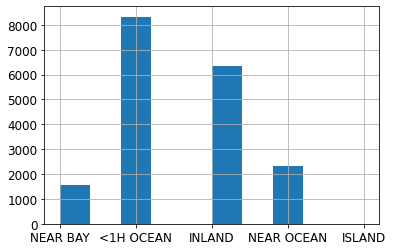

In [39]:
X.ocean_proximity.hist()
X.ocean_proximity.value_counts()

In order to feed a ML model with this data, we need to convert it somehow to numbers, a process know as `encoding`. There are many ways to do this, for instance:
* Assign a number to each category
* Convert each category into a new binary feature (which can be "on" or "off", 0 or 1)
* Learn a useful mapping from the cateogies to a low dimensional space (known as *embedding* )

In this example, we will use the `OneHotEncoder` from `sklearn`.

In [41]:
#complete below with the names of the categorical features
categorical_columns= ['ocean_proximity']
cat_features = X_train[categorical_columns].to_numpy()

#let's use scikitlearn's OneHotEncoder.
from sklearn.preprocessing import OneHotEncoder

#we instantiate the encoder
cat_encoder = OneHotEncoder()

#we fit it to the categorical data
cat_encoder.fit(cat_features)

#we use it to transform the categorical data. 
#Note that it was fitted on the training data, but we use it as well to transform the Test data
train_cat = cat_encoder.transform(X_train[categorical_columns])
test_cat = cat_encoder.transform(X_test[categorical_columns])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:444: UserWarning: X has feature names, but OneHotEncoder was fitted without feature names
  f"X has feature names, but {self.__class__.__name__} was fitted without"


To understand what happend to the features, print the variable before and after the transformation. Play with different sample indexes to see different cases.

In [42]:
sample = 2

print('Before encoding:\n', cat_features[sample])

print('After encoding:\n', train_cat[sample].toarray())

Before encoding:
 ['NEAR BAY']
After encoding:
 [[0. 0. 0. 1. 0.]]


Can you see the difference? Try to write down what it does:

```
Your explanation
````

You can use the encoder to convert back and forth from between the raw and encoded data:

In [43]:
for categorical_value in np.unique(cat_features):
    print(categorical_value + "\t----->\t" + str(cat_encoder.transform([[categorical_value]]).toarray()[0]))

<1H OCEAN	----->	[1. 0. 0. 0. 0.]
INLAND	----->	[0. 1. 0. 0. 0.]
ISLAND	----->	[0. 0. 1. 0. 0.]
NEAR BAY	----->	[0. 0. 0. 1. 0.]
NEAR OCEAN	----->	[0. 0. 0. 0. 1.]


Or read it straight forward from the following matrix:

In [44]:
cat_encoder.inverse_transform([[1,0,0,0,0],
                               [0,1,0,0,0],
                               [0,0,1,0,0],
                               [0,0,0,1,0],
                               [0,0,0,0,1],])

array([['<1H OCEAN'],
       ['INLAND'],
       ['ISLAND'],
       ['NEAR BAY'],
       ['NEAR OCEAN']], dtype=object)

In [45]:
train_cat.toarray()[:4]

array([[1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.]])

### Standarisation (Feature Scaling)

ML models don't handle well large difference in the scales of the features (as they treat them on equal foot). So to accelerate convergence of the algorithm (and sometimes, the only way to get convergence at all), it is really useful to scale the variables so they are between, say, [0,1], or [-1,1].

Previously, we filled the NaN values of the numercial columns and stored them in the numpy arrays `train_num` and `test_num`:

In [46]:
print(train_num[:3])
print(test_num[:3])

[[-1.17960000e+02  3.36700000e+01  1.60000000e+01  5.14300000e+03
   6.52000000e+02  2.20900000e+03  6.37000000e+02  7.01730000e+00
   1.26774256e-01  1.02354788e+00]
 [-1.17690000e+02  3.35200000e+01  3.00000000e+00  7.37400000e+03
   1.44400000e+03  3.21400000e+03  1.27900000e+03  4.53800000e+00
   1.95823162e-01  1.12900704e+00]
 [-1.22160000e+02  3.74800000e+01  3.60000000e+01  2.23800000e+03
   4.79000000e+02  1.94900000e+03  4.57000000e+02  2.37690000e+00
   2.14030384e-01  1.04814004e+00]]
[[-1.21200000e+02  3.77800000e+01  4.00000000e+00  5.80000000e+01
   2.90000000e+01  7.90000000e+01  2.90000000e+01  3.37500000e+00
   5.00000000e-01  1.00000000e+00]
 [-1.17010000e+02  3.27900000e+01  3.10000000e+01  3.77600000e+03
   8.15000000e+02  1.88600000e+03  7.99000000e+02  3.44210000e+00
   2.15836864e-01  1.02002503e+00]
 [-1.19690000e+02  3.68300000e+01  2.80000000e+01  1.86800000e+03
   3.50000000e+02  8.98000000e+02  3.29000000e+02  3.18140000e+00
   1.87366167e-01  1.06382979e+0

Now, we will use a standard scaler to subtract the mean of each feature, and divide by its standard deviation. This way, the scaled data will be zero-centered and with standard deviation of 1. (Cuanto se alejan del promedio ese valor: desvio estandar)

In [48]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#fill with the numerical dataset for training and test, respectively
train_num_scaled = scaler.fit_transform(train_num)
test_num_scaled = scaler.transform(test_num)

Plot the first samples of `train_num` and `train_num_scaled` to spot the difference.

In [49]:
print(train_num_scaled[:3])
print(test_num_scaled[:3])

[[ 0.76963807 -0.89657589 -0.95701272  1.11361839  0.24409866  0.62730062
   0.32752307  2.13627369 -1.61151101 -0.15503056]
 [ 0.90577651 -0.96637832 -2.09285146  2.11818488  2.09198723  1.48347009
   1.97446694  0.54492148 -0.33192346  0.06845646]
 [-1.34807099  0.87640573  0.7904315  -0.19443436 -0.15954367  0.40580404
  -0.13423689 -0.84219233  0.00548571 -0.10291532]]
[[-0.8640232   1.01601059 -2.00547925 -1.17603676 -1.20948035 -1.1872675
  -1.23219947 -0.20155641  5.30496371 -0.20493278]
 [ 1.24864369 -1.30608346  0.35357045  0.49809064  0.62440906  0.35213372
   0.74310704 -0.15848791  0.0389627  -0.16249612]
 [-0.10265638  0.57392855  0.09145382 -0.3610366  -0.46052552 -0.48955328
  -0.46259953 -0.32581962 -0.48864522 -0.06966592]]


We can also compare the means and standard deviations: (la media da cero)

In [50]:
print("Train before scaling:")
print(f"\t mean: {train_num.mean()}")
print(f"\t std: {train_num.std()}")

print("Train after scaling:")
print(f"\t mean: {train_num_scaled.mean()}")
print(f"\t std: {train_num_scaled.std()}")

Train before scaling:
	 mean: 514.7235266037857
	 std: 1177.6421661883855
Train after scaling:
	 mean: 2.613119437819943e-16
	 std: 1.0


Repeat the same with the test dataset. 

In [51]:
print("Test before scaling:")
print(f"\t mean: {test_num.mean()}")
print(f"\t std: {test_num.std()}")

print("Test after scaling:")
print(f"\t mean: {test_num_scaled.mean()}")
print(f"\t std: {test_num_scaled.std()}")

Test before scaling:
	 mean: 512.8597329036082
	 std: 1173.1261575916133
Test after scaling:
	 mean: 0.0031161752516696505
	 std: 0.9985199105342148


Do you notice something different? Why do you think this happens?

### Wrapping everything together: Prepared Features

Now that we've prepared our features, we can put everything together, the scaled and imputed numerical features with the encoded categorical features:

In [52]:
X_train_final = np.hstack([train_num_scaled, train_cat.toarray()])
X_test_final = np.hstack([test_num_scaled, test_cat.toarray()])

Check the shapes to see that its preserved after the `hstack`. Remember each row is a sample, and each column a feature.

In [53]:
train_num_scaled.shape, train_cat.shape

((14856, 10), (14856, 5))

In [54]:
X_train_final.shape

(14856, 15)

## Model Selection and training

Throughout this course we'll make extensive use of `sklearn`, so it is better to get acquainted with its conventions soon.

Classes divide into:
* Transformers: Transform the data (preprocessing toosl)
* Estimators: Make predictions from the data (models)

All classes have a `.fit` method, which fits the data. Transformers have a `.transform` method which transforms the data (and a `.fit_transform` which wraps the two steps into one). Estimators have a `.predict` method, which gives you the predictions.

transformamos el testeo para poder compararlo.
a nuestro cnjunt de entrenamiento, le hacemos el fit y luego el transform.
ahora vamos a ver de poder predecir cosas y hacer estimaciones.

So, the general structure would be: (el target es lo que queremos predecir: Es el valor que querés predecir. En este caso es el valor medio de las casas.)

````
my_model = Model()
my_model.fit(prepared_training_data, target)
````

and that's all...

Now, to get predictions, we do: 
````
my_predictions = my_model.predict(prepared_data)
````


### Before we move forward: Metrics

How do we know if our model is performing well? We need to measure it somehow!

On the previous lecture, we mentioned the Accuracy metric for classification tasks. This is the no-brainer way to go for classification. For regression tasks, the equivalent is the *Root Mean Squared Error* or *RMSE*. It measures the mean quadratic distance between our predictions and the actual value of our target. 

$$RMSE = \sqrt{ \frac{1}{N} \sum_{i=0}^{N-1} (prediction_i - target_i)^2}$$

Scikit-learn doesn't provide for a RMSE method, but it does provide its square: MSE. We can take the square root of this one to get the RMSE. The advantage of RMSE is that it has the same units as our target, i.e. for our dataset, is measured in dollars.

In [55]:
from sklearn.metrics import mean_squared_error

def rmse(a,b):
    return np.sqrt(mean_squared_error(a,b))

With this we can evaluate like `rmse(my_predictions,true_labels)`

In [56]:
#example:
rmse([0,4], [1,1])

2.23606797749979

# Now, let's fit!

We invite you to train some models from `sklearn`, and measure their performances... Are you up to the task? Run

In [57]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor



models = [LinearRegression(), DecisionTreeRegressor(), RandomForestRegressor()]

train_performance = []
test_performance = []
for model in models:
    model.fit(X_train_final, y_train)
    train_preds = model.predict(X_train_final)
    train_rmse = round(rmse(train_preds, y_train))
    train_performance.append(train_rmse)

    test_preds = model.predict(X_test_final)
    test_rmse = round(rmse(test_preds, y_test))
    test_performance.append(test_rmse)
    
    print(f"{type(model).__name__}")
    print(f"\tTrain performance: {train_rmse}")
    print(f"\tTest performance: {test_rmse}")

LinearRegression
	Train performance: 57832
	Test performance: 59175
DecisionTreeRegressor
	Train performance: 0
	Test performance: 63228
RandomForestRegressor
	Train performance: 16467
	Test performance: 45136


This performance is measured in dollars... Which model do you think is the best? 

Don't worry about details, we'll get into them soon.